In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import math
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

# Data

In [5]:
# Read data
motion = np.genfromtxt('../../dataset4_wbc/live_extraction/continuous_wbc_CoM_5minutes.csv', delimiter=',', dtype=np.float64)
contacts = np.genfromtxt('../../dataset4_wbc/live_extraction/continuous_wbc_CoM_5minutes.csv', delimiter=',', usecols=(57, 58, 59, 60), dtype=bool)
print("Motion data has a length of ", len(motion))

Motion data has a length of  21789


## Height-Force plots

In [6]:
def get_specific_cmd(dataset, fwd, side, rot):
    if abs(fwd): 
        return np.where(dataset[:, 1] > 0)[0] if fwd > 0 else np.where(dataset[:, 1] < 0)[0]
    if abs(side): 
        return np.where(dataset[:, 2] > 0)[0] if side > 0 else np.where(dataset[:, 2] < 0)[0]
    if abs(rot): 
        return np.where(dataset[:, 3] > 0)[0] if rot > 0 else np.where(dataset[:, 3] < 0)[0]

In [7]:
def get_swinging_motions(dataset, height=1):
    # rf min height (i.e swining motion)
    fl_min_height = np.where(dataset[:, 10] < height)[0]
    fr_min_height = np.where(dataset[:, 13] < height)[0]
    rl_min_height = np.where(dataset[:, 16] < height)[0]
    rr_min_height = np.where(dataset[:, 19] < height)[0]
            
    return fl_min_height,fr_min_height,rl_min_height,rr_min_height

### Step size

In [8]:
def get_step_size(dataset, footsteps, idx_coord=[8,11,14,17]):
    # Footsteps sizes
    step_size_fr = []
    step_size_fl = []
    step_size_rr = []
    step_size_rl = []
    footstep_period = []
    
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            #print("Time diff: ", time_diff)

            if time_diff < 0.6 and time_diff > 0.3:
                footstep_period.append(time_diff)
                step_size_fl.append(dataset[footsteps[idx], idx_coord[0]] - dataset[footsteps[idx-1], idx_coord[0]])
                step_size_fr.append(dataset[footsteps[idx], idx_coord[1]] - dataset[footsteps[idx-1], idx_coord[1]])
                step_size_rl.append(dataset[footsteps[idx], idx_coord[2]] - dataset[footsteps[idx-1], idx_coord[2]])
                step_size_rr.append(dataset[footsteps[idx], idx_coord[3]] - dataset[footsteps[idx-1], idx_coord[3]])
    
    # Convert to numpy array
    step_size_fl_numpy = np.array(step_size_fl)
    step_size_fr_numpy = np.array(step_size_fr)
    step_size_rl_numpy = np.array(step_size_rl)
    step_size_rr_numpy = np.array(step_size_rr)
    footstep_period_numpy = np.array(footstep_period)
    
    # Only keep positive footsteps
    step_size_fl_numpy = step_size_fl_numpy[np.where(step_size_fl_numpy > 0)[0]]
    step_size_fr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rl_numpy = step_size_rl_numpy[np.where(step_size_rl_numpy > 0)[0]]
    step_size_rr_numpy = step_size_rr_numpy[np.where(step_size_rr_numpy > 0)[0]]
                
    # Print average step-size
    print("Avg. step size time: ", np.mean(footstep_period_numpy))
    print("Min. step size time: ", np.min(footstep_period_numpy))
    print("Max. step size time: ", np.max(footstep_period_numpy))
    print("Std. step size time: ", np.std(footstep_period_numpy), "\n")
    #print(footstep_period_numpy)
    print("Avg. step size for fl foot: ", np.mean(step_size_fl_numpy))
    print("Avg. step size for fr foot: ", np.mean(step_size_fr_numpy))
    print("Avg. step size for rl foot: ", np.mean(step_size_rl_numpy))
    print("Avg. step size for rr foot: ", np.mean(step_size_rr_numpy), '\n')

    # Print std. dev. step-size
    print("Std. dev. step size for fl foot: ", np.std(step_size_fl_numpy))
    print("Std. dev. step size for fr foot: ", np.std(step_size_fr_numpy))
    print("Std. dev. step size for rl foot: ", np.std(step_size_rl_numpy))
    print("Std. dev. step size for rr foot: ", np.std(step_size_rr_numpy), '\n')
    
    return step_size_fr_numpy, step_size_fl_numpy, step_size_rr_numpy, step_size_rl_numpy

def step_size_statistics(dataset, footsteps, sign, motion, coordinates=[8,11,14,17]):
    # Step size and velocity along x axis
    for velocity in np.arange(0.1, 0.6, 0.1):
        print(f"Forward: Step size (x) {velocity * sign}")
        footsteps_velocity = footsteps[np.where((np.isclose(dataset[footsteps, motion], velocity * sign, 0.001)))[0]]
        step_size_fr_x_fwd,_,_,_ = get_step_size(dataset, footsteps_velocity, coordinates)
        print("\n")

#### Forward motion

In [9]:
footsteps_fwd = get_specific_cmd(motion, 1, 0, 0)

In [10]:
# Step size and velocity along x axis
step_size_statistics(motion, footsteps_fwd, 1, 1, [8,11,14,17])

Forward: Step size (x) 0.1
Avg. step size time:  0.4110414981842041
Min. step size time:  0.3546721935272217
Max. step size time:  0.47763729095458984
Std. step size time:  0.01871252882120093 

Avg. step size for fl foot:  0.008781076180037841
Avg. step size for fr foot:  0.011825432718250933
Avg. step size for rl foot:  0.011853767508231458
Avg. step size for rr foot:  0.008663785869640436 

Std. dev. step size for fl foot:  0.0007628203000286331
Std. dev. step size for fr foot:  0.0008156204016255497
Std. dev. step size for rl foot:  0.0007300276087231661
Std. dev. step size for rr foot:  0.000719126783020018 



Forward: Step size (x) 0.2
Avg. step size time:  0.4071685590558309
Min. step size time:  0.3545689582824707
Max. step size time:  0.45699119567871094
Std. step size time:  0.01735882595783577 

Avg. step size for fl foot:  0.024435702149055348
Avg. step size for fr foot:  0.026546273049240107
Avg. step size for rl foot:  0.02634707179621863
Avg. step size for rr foot:  0.0

In [11]:
# Step size and velocity along y axis
step_size_statistics(motion, footsteps_fwd, 1, 1, [9,12,15,18])

Forward: Step size (x) 0.1
Avg. step size time:  0.4110414981842041
Min. step size time:  0.3546721935272217
Max. step size time:  0.47763729095458984
Std. step size time:  0.01871252882120093 

Avg. step size for fl foot:  0.006065273464850928
Avg. step size for fr foot:  0.0050744204928045876
Avg. step size for rl foot:  0.0068539733681702115
Avg. step size for rr foot:  0.007547967070363912 

Std. dev. step size for fl foot:  0.0007535391127173924
Std. dev. step size for fr foot:  0.0008861965890984239
Std. dev. step size for rl foot:  0.0006994243087812939
Std. dev. step size for rr foot:  0.000520186657784873 



Forward: Step size (x) 0.2
Avg. step size time:  0.4071685590558309
Min. step size time:  0.3545689582824707
Max. step size time:  0.45699119567871094
Std. step size time:  0.01735882595783577 

Avg. step size for fl foot:  0.00914539369999607
Avg. step size for fr foot:  0.008088617449630731
Avg. step size for rl foot:  0.009371857019637971
Avg. step size for rr foot:  0

### Side motion (right)

In [12]:
footsteps_side_right = get_specific_cmd(motion, 0, -1, 0)

In [13]:
# Step size and velocity along x axis
step_size_statistics(motion, footsteps_side_right, -1, 2, [8,11,14,17])

Forward: Step size (x) -0.1
Avg. step size time:  0.41152910864325903
Min. step size time:  0.35078978538513184
Max. step size time:  0.4787321090698242
Std. step size time:  0.02025961958300651 

Avg. step size for fl foot:  0.007139323820293057
Avg. step size for fr foot:  0.002557616029961801
Avg. step size for rl foot:  0.0025611224328696966
Avg. step size for rr foot:  0.006626372389948055 

Std. dev. step size for fl foot:  0.0017051237192445385
Std. dev. step size for fr foot:  0.0016632693988494758
Std. dev. step size for rl foot:  0.0015764566208717854
Std. dev. step size for rr foot:  0.0018193258867025396 



Forward: Step size (x) -0.2
Avg. step size time:  0.41617449943961965
Min. step size time:  0.3487088680267334
Max. step size time:  0.49511051177978516
Std. step size time:  0.022833900775724943 

Avg. step size for fl foot:  0.007822262128416958
Avg. step size for fr foot:  0.0028733248464344655
Avg. step size for rl foot:  0.003212244958861245
Avg. step size for rr f

In [14]:
# Step size and velocity along y axis
step_size_statistics(motion, footsteps_side_right, -1, 2, [9,12,15,18])

Forward: Step size (x) -0.1
Avg. step size time:  0.41152910864325903
Min. step size time:  0.35078978538513184
Max. step size time:  0.4787321090698242
Std. step size time:  0.02025961958300651 

Avg. step size for fl foot:  0.02343825020572907
Avg. step size for fr foot:  0.005735052297210182
Avg. step size for rl foot:  0.006385629659645205
Avg. step size for rr foot:  0.024111297175271953 

Std. dev. step size for fl foot:  0.0029347547638758236
Std. dev. step size for fr foot:  0.0027573035449797584
Std. dev. step size for rl foot:  0.003955989466289299
Std. dev. step size for rr foot:  0.00340035520112269 



Forward: Step size (x) -0.2
Avg. step size time:  0.41617449943961965
Min. step size time:  0.3487088680267334
Max. step size time:  0.49511051177978516
Std. step size time:  0.022833900775724943 

Avg. step size for fl foot:  0.03777707860618845
Avg. step size for fr foot:  0.019884079371849217
Avg. step size for rl foot:  0.02184063791915875
Avg. step size for rr foot:  0.

### Side motions (left)

In [15]:
footsteps_side_left = get_specific_cmd(motion, 0, 1, 0)

In [16]:
# Step size and velocity along x axis
step_size_statistics(motion, footsteps_side_left, 1, 2, [8,11,14,17])

Forward: Step size (x) 0.1
Avg. step size time:  0.4127477482307789
Min. step size time:  0.35979700088500977
Max. step size time:  0.5910489559173584
Std. step size time:  0.018820819041119485 

Avg. step size for fl foot:  0.00436045264430615
Avg. step size for fr foot:  0.003930792581972948
Avg. step size for rl foot:  0.0033317784094996886
Avg. step size for rr foot:  0.0046151334859468075 

Std. dev. step size for fl foot:  0.0017546657202282259
Std. dev. step size for fr foot:  0.0006580750291575408
Std. dev. step size for rl foot:  0.0008101492284844228
Std. dev. step size for rr foot:  0.0021296977835945233 



Forward: Step size (x) 0.2
Avg. step size time:  0.4132763396344357
Min. step size time:  0.3624868392944336
Max. step size time:  0.594782829284668
Std. step size time:  0.021087427512461475 

Avg. step size for fl foot:  0.0023573682143425505
Avg. step size for fr foot:  0.004858788616170875
Avg. step size for rl foot:  0.003643605251939961
Avg. step size for rr foot: 

In [17]:
# Step size and velocity along y axis
step_size_statistics(motion, footsteps_side_left, 1, 2, [9,12,15,18])

Forward: Step size (x) 0.1
Avg. step size time:  0.4127477482307789
Min. step size time:  0.35979700088500977
Max. step size time:  0.5910489559173584
Std. step size time:  0.018820819041119485 

Avg. step size for fl foot:  0.004000636797102482
Avg. step size for fr foot:  0.024527714913796465
Avg. step size for rl foot:  0.024953201861148862
Avg. step size for rr foot:  0.0036789069602854167 

Std. dev. step size for fl foot:  0.005885473506402005
Std. dev. step size for fr foot:  0.004830735290957822
Std. dev. step size for rl foot:  0.0048528304776616115
Std. dev. step size for rr foot:  0.005487071927177401 



Forward: Step size (x) 0.2
Avg. step size time:  0.4132763396344357
Min. step size time:  0.3624868392944336
Max. step size time:  0.594782829284668
Std. step size time:  0.021087427512461475 

Avg. step size for fl foot:  0.013300215236441027
Avg. step size for fr foot:  0.04322491935134145
Avg. step size for rl foot:  0.043783493482501636
Avg. step size for rr foot:  0.01

### Rotation (clockwise)

In [18]:
footsteps_clock = get_specific_cmd(motion, 0, 0, -1)

In [19]:
# Step size and velocity along x axis
step_size_statistics(motion, footsteps_clock, -1, 3, [8,11,14,17])

Forward: Step size (x) -0.1
Avg. step size time:  0.41134759805498333
Min. step size time:  0.3626363277435303
Max. step size time:  0.5982797145843506
Std. step size time:  0.030007682941274618 

Avg. step size for fl foot:  0.002583962049884455
Avg. step size for fr foot:  0.00915307665496685
Avg. step size for rl foot:  0.001793163986468656
Avg. step size for rr foot:  0.010058835868311208 

Std. dev. step size for fl foot:  0.004270339209460295
Std. dev. step size for fr foot:  0.0027881596457815846
Std. dev. step size for rl foot:  0.002172897927753665
Std. dev. step size for rr foot:  0.0031451337520273077 



Forward: Step size (x) -0.2
Avg. step size time:  0.42151647566621747
Min. step size time:  0.36376047134399414
Max. step size time:  0.5997660160064697
Std. step size time:  0.03528076016772465 

Avg. step size for fl foot:  0.0081233790558283
Avg. step size for fr foot:  0.014372665548999982
Avg. step size for rl foot:  0.0040167820214884195
Avg. step size for rr foot:  0

In [20]:
# Step size along y axis 
step_size_statistics(motion, footsteps_clock, -1, 3, [9,12,15,18])

Forward: Step size (x) -0.1
Avg. step size time:  0.41134759805498333
Min. step size time:  0.3626363277435303
Max. step size time:  0.5982797145843506
Std. step size time:  0.030007682941274618 

Avg. step size for fl foot:  0.02983929379399354
Avg. step size for fr foot:  0.015524613803880422
Avg. step size for rl foot:  0.006062400355807075
Avg. step size for rr foot:  0.016378009476578637 

Std. dev. step size for fl foot:  0.008111708294634357
Std. dev. step size for fr foot:  0.007301622190276103
Std. dev. step size for rl foot:  0.005268140481044533
Std. dev. step size for rr foot:  0.005974226421257008 



Forward: Step size (x) -0.2
Avg. step size time:  0.42151647566621747
Min. step size time:  0.36376047134399414
Max. step size time:  0.5997660160064697
Std. step size time:  0.03528076016772465 

Avg. step size for fl foot:  0.05366078479534309
Avg. step size for fr foot:  0.035616119592457
Avg. step size for rl foot:  0.003933243304782041
Avg. step size for rr foot:  0.0257

### Rotation (counter clockwise)

In [21]:
footsteps_count = get_specific_cmd(motion, 0, 0, 1)

In [22]:
# Step size and velocity along x axis 
step_size_statistics(motion, footsteps_count, 1, 3, [8,11,14,17])

Forward: Step size (x) 0.1
Avg. step size time:  0.41465842948240395
Min. step size time:  0.3602311611175537
Max. step size time:  0.5982341766357422
Std. step size time:  0.03373109035565469 

Avg. step size for fl foot:  0.010464177965234417
Avg. step size for fr foot:  0.0030746411379672595
Avg. step size for rl foot:  0.007868206998146082
Avg. step size for rr foot:  0.001063837159378944 

Std. dev. step size for fl foot:  0.0013986773062130706
Std. dev. step size for fr foot:  0.0025282195788211555
Std. dev. step size for rl foot:  0.0022171974281340544
Std. dev. step size for rr foot:  0.0012437322172133899 



Forward: Step size (x) 0.2
Avg. step size time:  0.4196017636996862
Min. step size time:  0.36275219917297363
Max. step size time:  0.5998969078063965
Std. step size time:  0.03423219728265162 

Avg. step size for fl foot:  0.016651716260445645
Avg. step size for fr foot:  0.01069089620077541
Avg. step size for rl foot:  0.011599601126021743
Avg. step size for rr foot:  0

In [23]:
# Step size along y axis 
step_size_statistics(motion, footsteps_count, 1, 3, [9,12,15,18])

Forward: Step size (x) 0.1
Avg. step size time:  0.41465842948240395
Min. step size time:  0.3602311611175537
Max. step size time:  0.5982341766357422
Std. step size time:  0.03373109035565469 

Avg. step size for fl foot:  0.012422960988754029
Avg. step size for fr foot:  0.03157505808838387
Avg. step size for rl foot:  0.01689012467606701
Avg. step size for rr foot:  0.005255623049595568 

Std. dev. step size for fl foot:  0.005106451895351973
Std. dev. step size for fr foot:  0.00604857213342848
Std. dev. step size for rl foot:  0.003847322390613695
Std. dev. step size for rr foot:  0.0027150574663501637 



Forward: Step size (x) 0.2
Avg. step size time:  0.4196017636996862
Min. step size time:  0.36275219917297363
Max. step size time:  0.5998969078063965
Std. step size time:  0.03423219728265162 

Avg. step size for fl foot:  0.03349311478493541
Avg. step size for fr foot:  0.055049114814983424
Avg. step size for rl foot:  0.026170827680524932
Avg. step size for rr foot:  0.001973

### Footstep visualization

In [24]:
def euler_from_quaternion(x, y, z, w):
    """
    Convert a quaternion into euler angles (roll, pitch, yaw)
    roll is rotation around x in radians (counterclockwise)
    pitch is rotation around y in radians (counterclockwise)
    yaw is rotation around z in radians (counterclockwise)
    """
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    roll_x = math.atan2(t0, t1)
     
    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch_y = math.asin(t2)
     
    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    yaw_z = math.atan2(t3, t4)
     
    return roll_x, pitch_y, yaw_z # in radians

In [25]:
def visualize_static_foosteps(dataset, footsteps):
    old_xs = None
    old_ys = None
    old_zs = None
    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 8:20] = np.round(dataset[footstep, 8:20], 3)
        
        time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
        # 3D positions        
        xs = np.array([dataset[footstep, 8], dataset[footstep, 11], dataset[footstep, 14], dataset[footstep, 17]])
        ys = np.array([dataset[footstep, 9], dataset[footstep, 12], dataset[footstep, 15], dataset[footstep, 18]])
        zz = np.array([dataset[footstep, 10], dataset[footstep, 13], dataset[footstep, 16], dataset[footstep, 19]])

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()

        #print(xs, ys, zs, dataset[footstep, 2:5], dataset[footstep, 25:28])
        if idx > 0 and idx < len(footsteps):
            print(f'Diff: {time_diff}. Command: {dataset[footstep, 1:4]}. Coord: {[xs[0], ys[0], zs[0]]}. Step size: {[xs[0]-old_xs[0], ys[0]-old_ys[0], zs[0]-old_zs[0]]}.')
        else:
            print(f'Command: {dataset[footstep, 1:4]}. Coord: {[xs[0], ys[0], zs[0]]}.')
            
        old_xs = xs
        old_ys = ys
        old_zs = zs

In [26]:
def update_points(num, dataset, footsteps, x, y, z, points):    
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    dataset[footstep, 8:20] = np.round(dataset[footstep, 8:20], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 8], dataset[footstep, 11], dataset[footstep, 14], dataset[footstep, 17]])
    new_y = np.array([dataset[footstep, 9], dataset[footstep, 12], dataset[footstep, 15], dataset[footstep, 18]])
    new_z = np.array([dataset[footstep, 10], dataset[footstep, 13], dataset[footstep, 16], dataset[footstep, 19]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    dataset[footstep, 8:20] = np.round(dataset[footstep, 8:20], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 8], dataset[footstep, 11], dataset[footstep, 14], dataset[footstep, 17]])
    y = np.array([dataset[footstep, 9], dataset[footstep, 12], dataset[footstep, 15], dataset[footstep, 18]])
    z = np.array([dataset[footstep, 10], dataset[footstep, 13], dataset[footstep, 16], dataset[footstep, 19]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, footsteps, x, y, z, points))
    
    return anim   

In [27]:
def visualize_absolute_foostep_sizes(dataset, footsteps):
    prev_yaw = 0
    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        dataset[footstep, 8:20] = np.round(dataset[footstep, 8:20], 3)
        
        if idx < (len(footsteps) - 1):
            print("Command: ", dataset[footstep, 1:4])
            time_difference = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
            
            if time_difference < 1:
                fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
                axes[0].set_xlabel('X Label')
                axes[0].set_ylabel('Y Label')
                axes[1].set_xlabel('X Label')
                axes[1].set_ylabel('Y Label')
                    
                # Get euler angles from odom to base rotation
                _, _, curh_yaw = euler_from_quaternion(dataset[footstep, 47], dataset[footstep, 48], dataset[footstep, 49], dataset[footstep, 50])
                _, _, next_yaw = euler_from_quaternion(dataset[footsteps[idx+1], 47], dataset[footsteps[idx+1], 48], dataset[footsteps[idx+1], 49], dataset[footsteps[idx+1], 50])

                # Compute rotation matrix
                c_curh, s_curh = np.cos(curh_yaw), np.sin(curh_yaw)
                c_next, s_next = np.cos(next_yaw), np.sin(next_yaw)
                R_curh = np.array(((c_curh, -s_curh), (s_curh, c_curh)))
                R_next = np.array(((c_next, -s_next), (s_next, c_next)))
                
                # Odom base vectors
                curh_base = np.array([[dataset[footstep, 44], dataset[footstep, 45]]])
                next_base = np.array([[dataset[footsteps[idx+1], 44], dataset[footsteps[idx+1], 45]]])
                
                # Local base vectors
                local_curh_base = R_curh.T @ curh_base.T
                local_next_base = R_curh.T @ next_base.T
                local_next_base_next = R_next.T @ next_base.T
                base_displacement = local_next_base - local_curh_base
                
                #print("Footstep timestamp: ", dataset[footstep, 0])
                print(f'\nFL moving: {contacts[idx, 0]}. FR moving: {contacts[idx, 1]}')
                print(f'RL moving: {contacts[idx, 2]}. RR moving: {contacts[idx, 3]}')
                
                #print(f'Curh base (not transformed): {dataset[footstep, 31:33]}. Next base (not transformed): {dataset[footsteps[idx+1], 31:33]}.')
                #print(f'Curh base transformed (x): {local_curh_base.tolist()}.\nNext base transformed (y): {local_next_base.tolist()}.\nNext base transformed2 (y): {local_next_base_next.tolist()}\n')
                print(prev_yaw, curh_yaw)
                print(f'Base displacement: {base_displacement.tolist()}. Rotation displacement: {(curh_yaw - prev_yaw) * 180 / np.pi}.\n')
                
                print("CoM displacement: ")
                print(f'lf (x): {dataset[footsteps[idx], 8]}, {dataset[footsteps[idx+1], 8]}, lf (y): {dataset[footsteps[idx], 9]}, {dataset[footsteps[idx+1], 9]}.')
                print(f'lf displacement: {(dataset[footsteps[idx+1], 8] - dataset[footsteps[idx], 8]).tolist()}, {(dataset[footsteps[idx+1], 9] - dataset[footsteps[idx], 9]).tolist()}.\n')
                
                print(f'lh (x): {dataset[footsteps[idx], 11]}, {dataset[footsteps[idx+1], 11]}, lh (y): {dataset[footsteps[idx], 12]}, {dataset[footsteps[idx+1], 12]}.')
                print(f'lh displacement: {(dataset[footsteps[idx+1], 11] - dataset[footsteps[idx], 11]).tolist()}, {(dataset[footsteps[idx+1], 12] - dataset[footsteps[idx], 12]).tolist()}.\n')
                
                print(f'rf (x): {dataset[footsteps[idx], 14]}, {dataset[footsteps[idx+1], 14]}, rf (y): {dataset[footsteps[idx], 15]}, {dataset[footsteps[idx+1], 15]}.')
                print(f'rf displacement: {(dataset[footsteps[idx+1], 14] - dataset[footsteps[idx], 14]).tolist()}, {(dataset[footsteps[idx+1], 15] - dataset[footsteps[idx], 15]).tolist()}.\n')
                
                print(f'rh (x): {dataset[footsteps[idx], 17]}, {dataset[footsteps[idx+1], 17]}, rh (y): {dataset[footsteps[idx], 18]}, {dataset[footsteps[idx+1], 18]}.')
                print(f'rh displacement: {(dataset[footsteps[idx+1], 17] - dataset[footsteps[idx], 17]).tolist()}, {(dataset[footsteps[idx+1], 18] - dataset[footsteps[idx], 18]).tolist()}.\n')
        
                # Feet displacements
                lf_x_displacement = dataset[footsteps[idx+1], 8] - dataset[footsteps[idx], 8]
                lf_y_displacement = dataset[footsteps[idx+1], 9] - dataset[footsteps[idx], 9]
                lh_x_displacement = dataset[footsteps[idx+1], 11] - dataset[footsteps[idx], 11]
                lh_y_displacement = dataset[footsteps[idx+1], 12] - dataset[footsteps[idx], 12]
                rf_x_displacement = dataset[footsteps[idx+1], 14] - dataset[footsteps[idx], 14]
                rf_y_displacement = dataset[footsteps[idx+1], 15] - dataset[footsteps[idx], 15]
                rh_x_displacement = dataset[footsteps[idx+1], 17] - dataset[footsteps[idx], 17]
                rh_y_displacement = dataset[footsteps[idx+1], 18] - dataset[footsteps[idx], 18]
                
                # Support foot base displacement
                support_base_displacement = [0, 0]
                if contacts[idx, 1]:
                    support_base_displacement[0] = -lf_x_displacement
                    support_base_displacement[1] = -lf_y_displacement
                else:
                    support_base_displacement[0] = -rf_x_displacement
                    support_base_displacement[1] = -rf_y_displacement
                
                prev_yaw = curh_yaw
                    
                print(f'\nBase displacement (CoM): {support_base_displacement}.\n')
                    
                x_0 = np.array([dataset[footstep, 8], 
                                dataset[footstep, 11],
                                dataset[footstep, 14], 
                                dataset[footstep, 17]])
                y_0 = np.array([dataset[footstep, 9], 
                                dataset[footstep, 12],
                                dataset[footstep, 15], 
                                dataset[footstep, 18]])
                
                """
                x_1 = np.array([dataset[footsteps[idx+1], 7], 
                                dataset[footsteps[idx+1], 10],
                                dataset[footsteps[idx+1], 13], 
                                dataset[footsteps[idx+1], 16]])
                y_1 = np.array([dataset[footsteps[idx+1], 8], 
                                dataset[footsteps[idx+1], 11],
                                dataset[footsteps[idx+1], 14], 
                                dataset[footsteps[idx+1], 17]])
                """
                
                x_1 = np.array([dataset[footstep, 8] + lf_x_displacement, 
                                dataset[footstep, 11] + rf_x_displacement,
                                dataset[footstep, 14] + lh_x_displacement, 
                                dataset[footstep, 17] + rh_x_displacement])
                y_1 = np.array([dataset[footstep, 9] + lf_y_displacement, 
                                dataset[footstep, 12] + rf_y_displacement,
                                dataset[footstep, 15] + lh_y_displacement, 
                                dataset[footstep, 18] + rh_y_displacement])
                
                #axes[0].scatter(x_0, y_0, c= 'b',marker='o')
                axes[0].scatter(x_0, y_0, c= 'm',marker='o')
                axes[0].scatter(0, 0, c= 'g', marker='^')
                axes[0].scatter(base_displacement[0], base_displacement[1], c= 'y', marker='^')
                axes[0].scatter(support_base_displacement[0], support_base_displacement[1], c= 'r', marker='^')
                
                axes[1].scatter(x_1, y_1, c= 'r', marker='o')
                axes[1].scatter(x_1, y_1, c= 'c', marker='o')
                
                plt.show()
                
#visualize_absolute_foostep_sizes(motion, footsteps_fwd)                  

### Forward motion

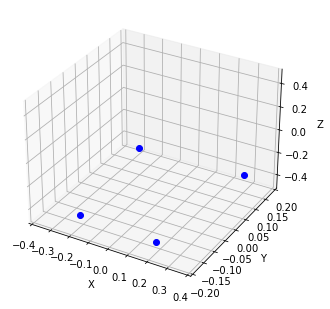

In [36]:
anim = visualize_animated_footsteps(motion, footsteps_fwd, "bo")
HTML(anim.to_html5_video())

### Side motion (right)

CalledProcessError: Command '['/usr/bin/ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '5.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpxsuvtbn_/temp.m4v']' returned non-zero exit status 255.

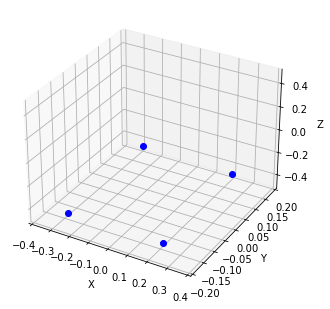

In [37]:
anim = visualize_animated_footsteps(motion, footsteps_side_right, "bo")
HTML(anim.to_html5_video())

### Side motion (left)

In [ ]:
anim = visualize_animated_footsteps(motion, footsteps_side_left, "bo")
HTML(anim.to_html5_video())

### Rotation (clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion, footsteps_01_clock, "bo")
HTML(anim.to_html5_video())

### Rotation (counter clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion, footsteps_count, "bo")
HTML(anim.to_html5_video())

# Dataset Preparation

In [28]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
def relative_footstep_prediction_dataset(dataset, footsteps, debug=False):
    # Footsteps sizes
    inputs = []
    labels = []
    
    for idx, footstep in enumerate(footsteps):
        if idx < (len(footsteps) - 1):
            # Compute time difference between
            # curhent and next footsteps
            time_difference = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
            
            if time_difference < 0.5:
                fl_moving = contacts[idx, 0]
                fr_moving = contacts[idx, 1]
                rl_moving = contacts[idx, 2]
                rr_moving = contacts[idx, 3]
                
                if debug:
                    print("Time difference: ", time_difference)
                    print("Footstep timestamp: ", dataset[footstep, 0])
                    print(f'lf moving: {fl_moving}. rf moving: {fr_moving}')
                    print(f'lh moving: {rl_moving}. rh moving: {rr_moving}')

                if (not fr_moving != fl_moving or not fr_moving == rl_moving or not fl_moving == rr_moving):
                    print("Exception")
                    print("Time difference: ", time_difference)
                    #print("Footstep timestamp: ", dataset[footstep, 0])
                    print(f'fl moving: {fl_moving}. fr moving: {fr_moving}')
                    print(f'rl moving: {rl_moving}. rr moving: {rr_moving}')
                    continue
                
                assert fr_moving == rl_moving
                assert rr_moving == fl_moving
                assert fr_moving != fl_moving
            
                inputs.append(dataset[footsteps[idx], 1:4].tolist() + 
                              dataset[footsteps[idx], 51:57].tolist() + 
                              dataset[footsteps[idx], 8:20].tolist() + 
                              contacts[footsteps[idx+1], :].tolist() + 
                              dataset[footsteps[idx+1], 1:4].tolist())
                
                labels.append(dataset[footsteps[idx+1], 8:10].tolist() +  
                              dataset[footsteps[idx+1], 11:13].tolist() + 
                              dataset[footsteps[idx+1], 14:16].tolist() + 
                              dataset[footsteps[idx+1], 17:19].tolist())
                
                                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy

X_relative_footsteps_fwd, Y_relative_footsteps_fwd = relative_footstep_prediction_dataset(motion, footsteps_fwd)
X_relative_footsteps_clock, Y_relative_footsteps_clock = relative_footstep_prediction_dataset(motion, footsteps_clock)
X_relative_footsteps_count, Y_relative_footsteps_count = relative_footstep_prediction_dataset(motion, footsteps_count)
X_relative_footsteps_left, Y_relative_footsteps_left = relative_footstep_prediction_dataset(motion, footsteps_side_left)
X_relative_footsteps_right, Y_relative_footsteps_right = relative_footstep_prediction_dataset(motion, footsteps_side_right)

# Stack datasets
X_relative_footsteps_continuous = np.concatenate((X_relative_footsteps_fwd, X_relative_footsteps_clock, X_relative_footsteps_count, X_relative_footsteps_left, X_relative_footsteps_right))
Y_relative_footsteps_continuous = np.concatenate((Y_relative_footsteps_fwd, Y_relative_footsteps_clock, Y_relative_footsteps_count, Y_relative_footsteps_left, Y_relative_footsteps_right))

# Log
print(X_relative_footsteps_continuous.shape)
print(Y_relative_footsteps_continuous.shape)

(21421, 28)
(21421, 8)


In [30]:
%store X_relative_footsteps_continuous
%store Y_relative_footsteps_continuous

Stored 'X_relative_footsteps_continuous' (ndarray)
Stored 'Y_relative_footsteps_continuous' (ndarray)
